# yt_aspect (and general yt config)

ASPECT: https://aspect.geodynamics.org/ 

An externally packaged frontend!

```python
pip install yt_aspect
```

Both ASPECT and a generic .pvtu loader

In [1]:
import yt 
import os

files = list(os.listdir(os.path.join(yt.config.ytcfg.get('yt','test_data_dir'), 
                        'aspect/output_shell_simple_2d/solution/')))
files.sort()
print("\n".join(files))

.solution-00000.json
.solution-00001.json
.solution-00002.json
.solution-00004.json
solution-00000.0000.vtu
solution-00000.0001.vtu
solution-00000.0002.vtu
solution-00000.0003.vtu
solution-00000.0004.vtu
solution-00000.pvtu
solution-00000.visit
solution-00001.0000.vtu
solution-00001.0001.vtu
solution-00001.0002.vtu
solution-00001.0003.vtu
solution-00001.0004.vtu
solution-00001.pvtu
solution-00001.visit
solution-00002.0000.vtu
solution-00002.0001.vtu
solution-00002.0002.vtu
solution-00002.0003.vtu
solution-00002.0004.vtu
solution-00002.pvtu
solution-00002.visit
solution-00003.0000.vtu
solution-00003.0001.vtu
solution-00003.0002.vtu
solution-00003.0003.vtu
solution-00003.0004.vtu
solution-00003.pvtu
solution-00003.visit
solution-00004.0000.vtu
solution-00004.0001.vtu
solution-00004.0002.vtu
solution-00004.0003.vtu
solution-00004.0004.vtu
solution-00004.pvtu
solution-00004.visit


## aside: yt config 

https://yt-project.org/doc/reference/configuration.html#the-configuration



In [2]:
yt.config.ytcfg

## back to ASPECT ...

In [3]:
import yt
import yt_aspect  # registers with yt

In [4]:
# 2d thermal convection in a spherical shell (but data is cartesian)
# give path to the `.pvtu`, it will handle the `.vtu` chunks - but will concatenate :( 
ds = yt.load('aspect/output_shell_simple_2d/solution/solution-00004.pvtu')

yt : [INFO     ] 2025-07-17 10:32:30,505 Parameters: current_time              = 0.0
yt : [INFO     ] 2025-07-17 10:32:30,507 Parameters: domain_dimensions         = [1 1]
yt : [INFO     ] 2025-07-17 10:32:30,508 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-07-17 10:32:30,510 Parameters: domain_right_edge         = [6.336e+06 6.336e+06 1.000e+00]
yt : [INFO     ] 2025-07-17 10:32:30,512 Parameters: cosmological_simulation   = 0


In [5]:
ds.field_list

[('all', 'T'),
 ('all', 'p'),
 ('all', 'velocity_x'),
 ('all', 'velocity_y'),
 ('all', 'velocity_z'),
 ('connect0', 'T'),
 ('connect0', 'p'),
 ('connect0', 'velocity_x'),
 ('connect0', 'velocity_y'),
 ('connect0', 'velocity_z')]

yt : [INFO     ] 2025-07-17 10:32:41,717 xlim = 0.000000 6336000.000000
yt : [INFO     ] 2025-07-17 10:32:41,718 ylim = 0.000000 6336000.000000
yt : [INFO     ] 2025-07-17 10:32:41,731 xlim = 0.000000 6336000.000000
yt : [INFO     ] 2025-07-17 10:32:41,732 ylim = 0.000000 6336000.000000
yt : [INFO     ] 2025-07-17 10:32:41,744 Making a fixed resolution buffer of (('all', 'T')) 800 by 800



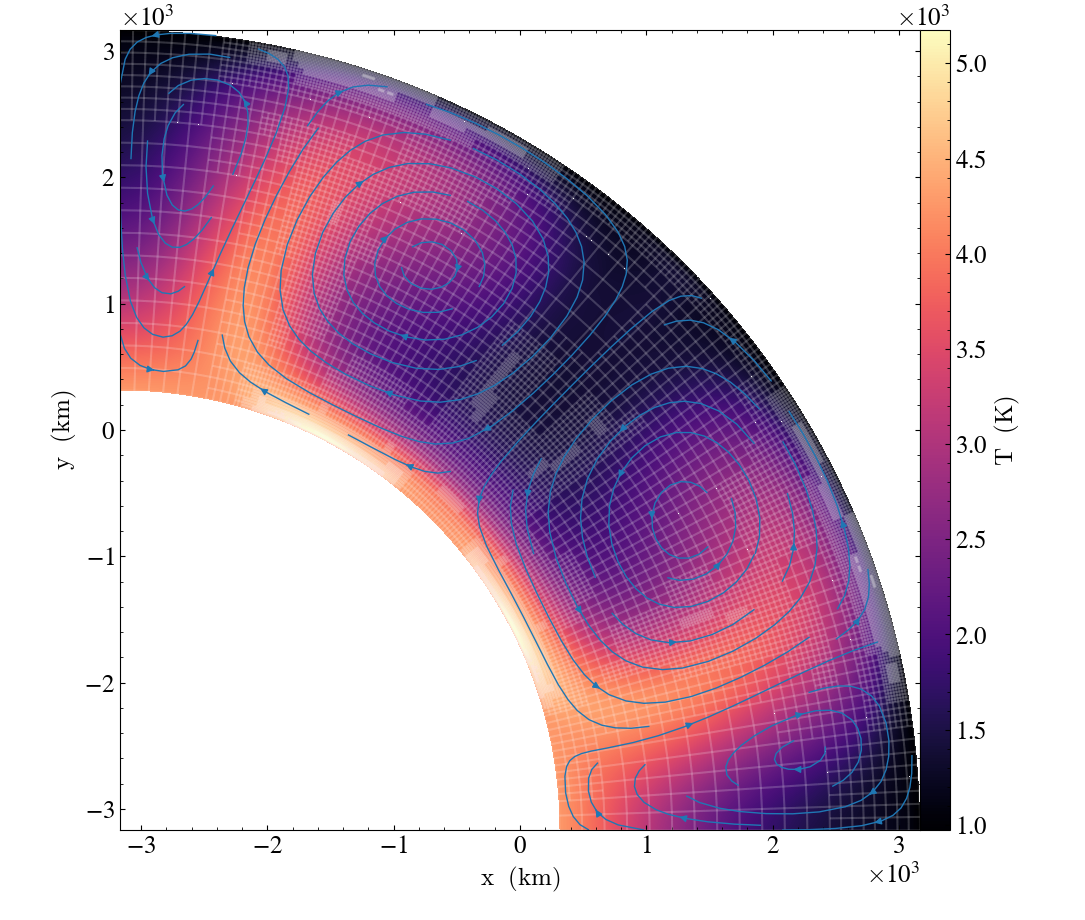

In [6]:
slc = yt.plot_2d(ds, ('all', 'T'))
slc.set_cmap(('all', 'T'), 'magma')
slc.annotate_mesh_lines(color=(1., 1., 1., 0.1))
slc.annotate_streamlines(('all', 'velocity_x'), ('all', 'velocity_y'))

## a 3D example

Emergent fault structures during lithosphere extension (data courtesy of John Naliboff, New Mexico Tech)

Unstructured Mesh Rendering: Opaque sources, but can have some cutting planes

https://yt-project.org/doc/visualizing/unstructured_mesh_rendering.html

(with optional accelerated ray tracing via [Embree](https://github.com/RenderKit/embree))

![](figures/aspect_mesh_00011.png)

## Interested in Unstructured Mesh Development in y?

High priorities
* proper chunking (currently mesh chunks need to be concatenated)
* volume rendering